In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import time
from time import perf_counter
import glob
import json
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import figure
import tweets_utils
import importlib
%autosave 3600

Autosaving every 3600 seconds


# Indice

- [Verified create df](#verified)
- [Merge CCDH df](#merge_df)
- [Disinform Dozen vs Verified users behaviour](#ccdh_behaviour)
   
  ### General
    - [Stats](#stats)

  ### Interactions
    - [CCDH Top Users](#top_c)
    - [Verified Top Users](#top_v)
    
  ### Hashtags
    - [CCDH Hashtag used](#hastag_ccdh)
    - [Verified Hashtag used](#hastag_verified)
    
  ### Urls
    - [Urls CCDH](#ccdh_urls)
    - [Urls Verified](#ccdh_verified)
    
  ### Bot score
   - [CCDH bot score distribution](#ccdh_bot)
   - [Verified bot score distribution](#verified_bot)

### Verified df
<a id="verified"/>

In [2]:
files_users = glob.glob("F:/COVID-19-Tweets/*/users.csv")
files_tweets = glob.glob("F:/COVID-19-Tweets/*/tweets.csv")

In [4]:
names = []
users = []
verified = []
cols_users = [u'id', u'screen_name', u'verified'] 

cols_tweets = [
    u'user_id',u'user_screen_name', u'hashtags', u'urls',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id', 
    u'rt_created_at', u'in_reply_to_status_id'
              ]

In [56]:
chunksize = 10
for chunk in pd.read_csv(files_tweets[0], chunksize=10, lineterminator = '\n'):
    df = chunk
    break
df.info()

In [55]:
result = []
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_users:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_users, False))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        users.extend(lista[i]["users"])
        verified.extend(lista[i]["verified"])
        
for i in range(len(users)):
    if(verified[i] == True):
        names.append(users[i])
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [54]:
names = list(pd.Series(names).unique())
names

In [53]:
result = []
data = pd.DataFrame()
importlib.reload(tweets_utils)
start_time = time.perf_counter()
j = 0
for filename in files_tweets:
    print(f"Reading file: {filename}")
    result.extend(tweets_utils.process_all_data(filename, cols_tweets, True, names))
    lista = result[j]
    j = j + 1
    print(f"Mese numero {j}")
    for i in range(len(lista)):
        data = data.append(lista[i]["df"])
    print(len(data))
stop_time = time.perf_counter()
print("Time: ",stop_time-start_time)

In [52]:
data = data.reset_index(drop=True)
data

### Merge CCDH
<a id="merge_df"/>

In [2]:
path =  glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
path

['C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/']

In [4]:
# data.to_csv("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/verified_tweets.csv", index=False)

In [5]:
cols = [
    u'id',u'user_id',u'user_screen_name',u'urls', u'hashtags',
    u'rt_user_screen_name', u'rt_user_id', 
    u'in_reply_to_screen_name', u'in_reply_to_user_id']

In [51]:
ccdh_original_complete = pd.read_csv(path[0] + "ccdh_tweets.csv", usecols = cols)
ccdh_original_complete

In [48]:
ccdh_rt_complete = pd.read_csv(path[0] + "ccdh_retweets.csv", usecols = cols)
ccdh_rt_complete

In [47]:
ccdh_rt_searched = pd.read_csv(path[0] + "ccdh_user_rt.csv")
ccdh_rt_searched

In [46]:
ccdh_rp_searched = pd.read_csv(path[0] + "ccdh_user_rp.csv")
ccdh_rp_searched

In [45]:
ccdh_original_searched = pd.read_csv(path[0] + "ccdh_original.csv")
ccdh_original_searched

In [32]:
df = ccdh_original_complete.append(ccdh_rt_searched)
df = df.append(ccdh_rt_complete)
df = df.append(ccdh_rp_searched)
df = df.append(ccdh_original_searched)

In [33]:
df = df.reset_index(drop=True)

In [34]:
df.drop_duplicates(subset ="id", keep = False, inplace = True)

In [44]:
# df

In [41]:
new_l = len(df)
old_sum = len(ccdh_original_complete) + len(ccdh_rt_complete) + len(ccdh_rt_searched) + len(ccdh_rp_searched) + len(ccdh_original_searched)
print(f"New df length: {new_l}")
print(f"Sum of all length: {(old_sum)}")
print(f"Diff: {old_sum - new_l}")

New df length: 129358
Sum of all length: 129736
Diff: 378


In [42]:
df.to_csv(path[0] + "ccdh_merged_tweets.csv", index=False)

# Disinform Dozen vs Verified users behaviour
<a id="ccdh_behaviour"/>

In [3]:
path =  glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/ccdh/")
df = pd.read_csv(path[0] + "ccdh_merged_tweets.csv")
v_path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/large_files/")
df_v = pd.read_csv(v_path[0] + "verified_tweets.csv")
# df_v

In [4]:
# df

In [5]:
original = df[df['rt_user_id'].isna() & df['in_reply_to_user_id'].isna()]
retweet = df[df['rt_user_id'].notna()]
reply = df[df['in_reply_to_user_id'].notna()]
total_len = len(df)
len_original = len(original)
len_rt = len(retweet)
len_rp = len(reply)

original_v = df_v[df_v['rt_user_id'].isna() & df_v['in_reply_to_user_id'].isna()]
retweet_v = df_v[df_v['rt_user_id'].notna()]
reply_v = df_v[df_v['in_reply_to_user_id'].notna()]
total_len_v = len(df_v)
len_original_v = len(original_v)
len_rt_v = len(retweet_v)
len_rp_v = len(reply_v)

In [6]:
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv", usecols=[u"screen_name"])
disinform

,screen_name
0,mercola
1,RobertKennedyJr
2,TyCharleneB
3,BusyDrT
4,IslamRizza
5,DrButtar
6,unhealthytruth
7,sayerjigmi
8,KellyBroganMD
9,DrChrisNorthrup


In [16]:
original_ccdh = []
for i in original["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            original_ccdh.append(i)

rt_ccdh = []
for i in retweet["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            rt_ccdh.append(i)

rp_ccdh = []
for i in reply["user_screen_name"]:
    for j in disinform["screen_name"]:
        if i == j:
            rp_ccdh.append(i)
total_ccdh = len(original_ccdh) + len(rt_ccdh) + len(rp_ccdh)

## Stats
<a id="stats"/>

#### CCDH Actions

In [19]:
tweets_utils.stats(total_ccdh, len(original_ccdh), len(rt_ccdh), len(rp_ccdh))

Number of total tweets: 18964
Number of original tweets: 14602
Number of retweet: 2670
Number of reply: 1692
Number of original_tweets: 77.0% of total tweets
Number of retweets: 14.08% of total tweets
Number of replies: 8.92% of total tweets
Check sum == len(tweets):  True


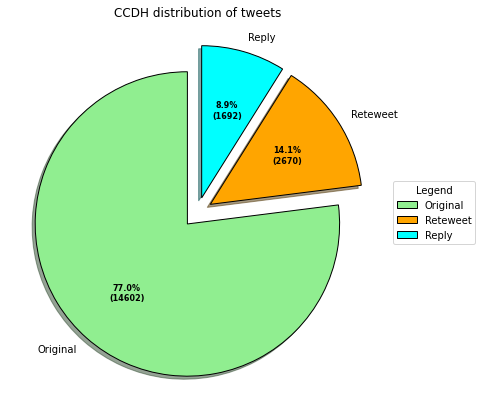

In [21]:
tweets_utils.print_pie_chart3("CCDH distribution of tweets", "Original", "Reteweet", "Reply", 
    len(original_ccdh), len(rt_ccdh), len(rp_ccdh))

#### CCDH interactions

In [66]:
tweets_utils.stats(total_len, len_original, len_rt, len_rp)

Number of total tweets: 129358
Number of original tweets: 17568
Number of retweet: 109864
Number of reply: 1926
Number of original_tweets: 13.58% of total tweets
Number of retweets: 84.93% of total tweets
Number of replies: 1.49% of total tweets
Check sum == len(tweets):  True


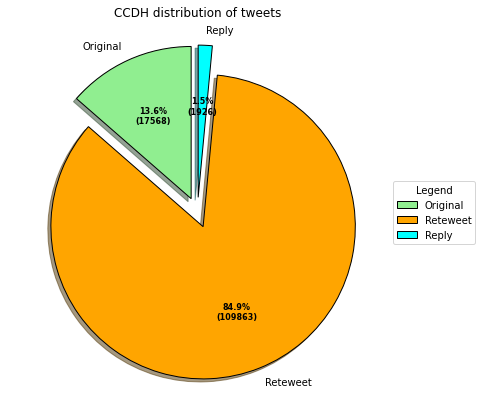

In [67]:
tweets_utils.print_pie_chart3("CCDH distribution of interactions", "Original", "Reteweet", "Reply", 
    len_original, len_rt, len_rp)

#### Verified

In [107]:
tweets_utils.stats(total_len_v, len_original_v, len_rt_v, len_rp_v)

Number of total tweets: 1687343
Number of original tweets: 1003621
Number of retweet: 573672
Number of reply: 110050
Number of original_tweets: 59.48% of total tweets
Number of retweets: 34.0% of total tweets
Number of replies: 6.52% of total tweets
Check sum == len(tweets):  True


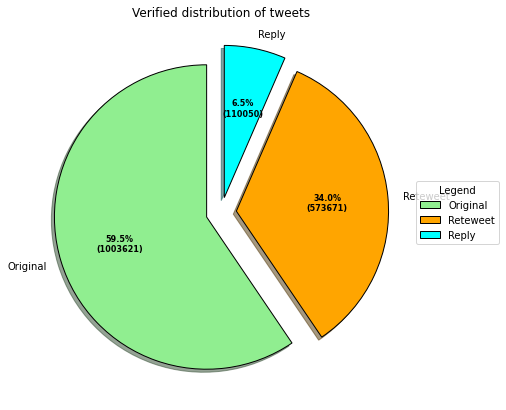

In [108]:
tweets_utils.print_pie_chart3("Verified distribution of tweets", "Original", "Reteweet", "Reply", 
    len_original_v, len_rt_v, len_rp_v)

## CCDH Top Users
<a id="top_c" />

In [8]:
path_disinform = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
disinform = pd.read_csv(path_disinform[0] + "disinformation_users.csv")
disinform["screen_name"]

0             mercola
1     RobertKennedyJr
2         TyCharleneB
3             BusyDrT
4          IslamRizza
5            DrButtar
6      unhealthytruth
7          sayerjigmi
8       KellyBroganMD
9     DrChrisNorthrup
10       DrBenTapper1
11       kevdjenkins1
Name: screen_name, dtype: object

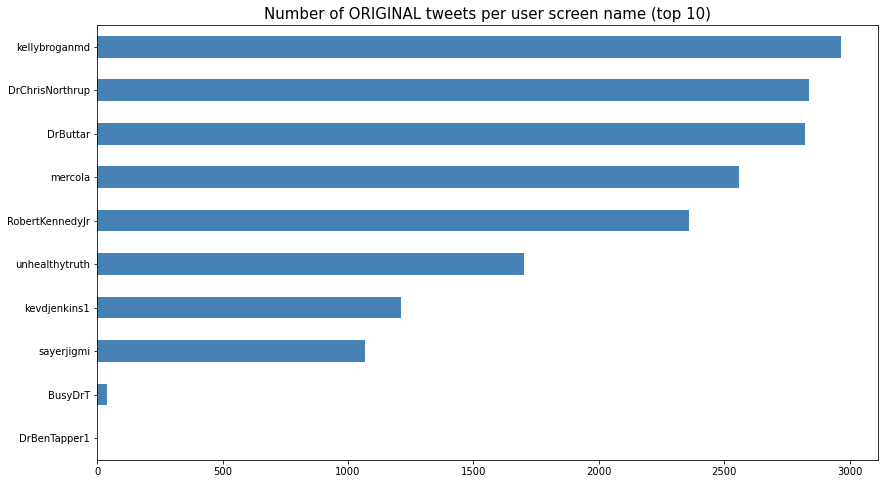

In [7]:
val = pd.Series(original["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:12].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

In [9]:
importlib.reload(tweets_utils)
val = pd.Series(retweet["user_screen_name"])
value_d = []
value_u = []
for i in val:
    if(tweets_utils.found(i, disinform["screen_name"])):
        value_d.append(i)
    else:
        value_u.append(i)

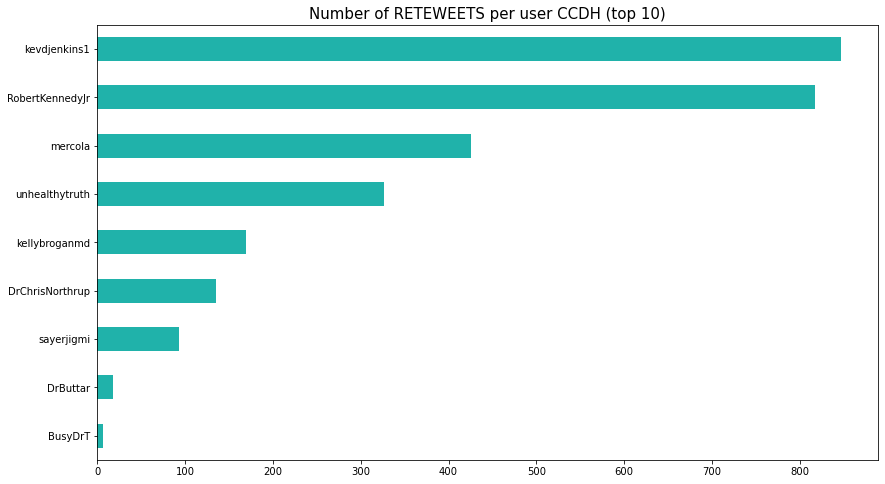

In [11]:
val = pd.Series(value_d)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:12].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user CCDH (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

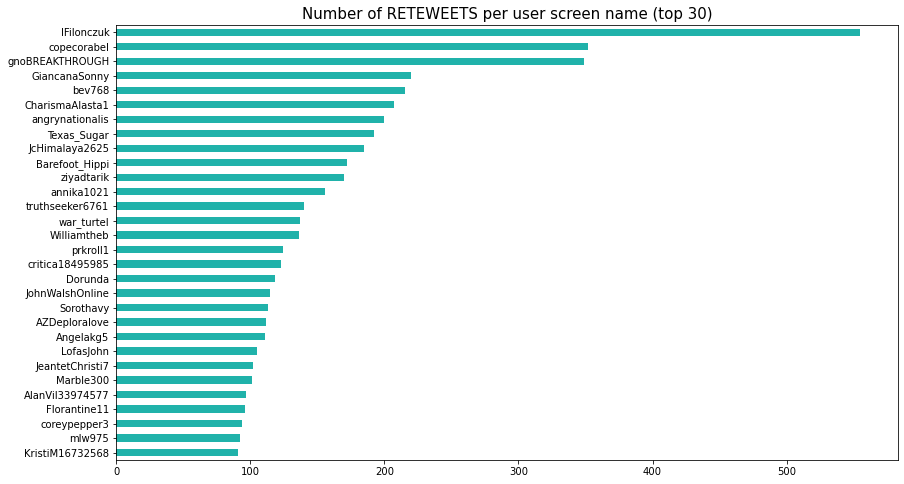

In [12]:
val = pd.Series(value_u)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

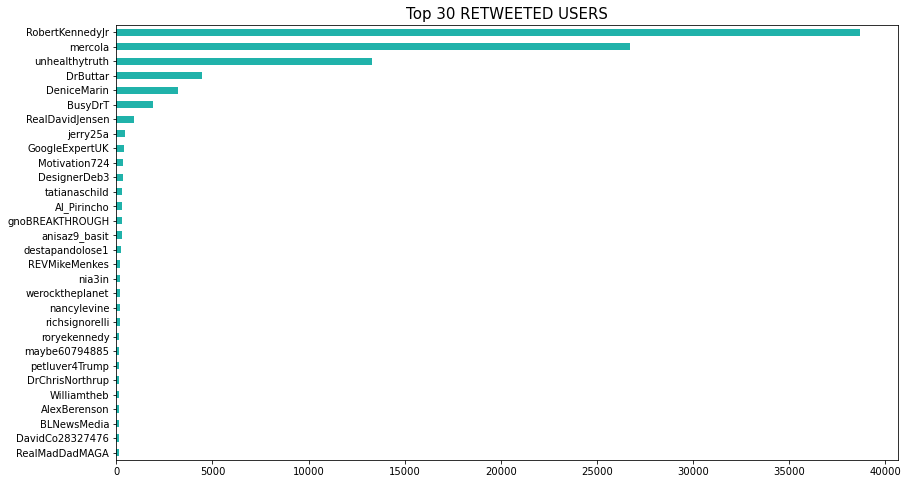

In [14]:
rt_names = val
val = pd.Series(retweet["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 30 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

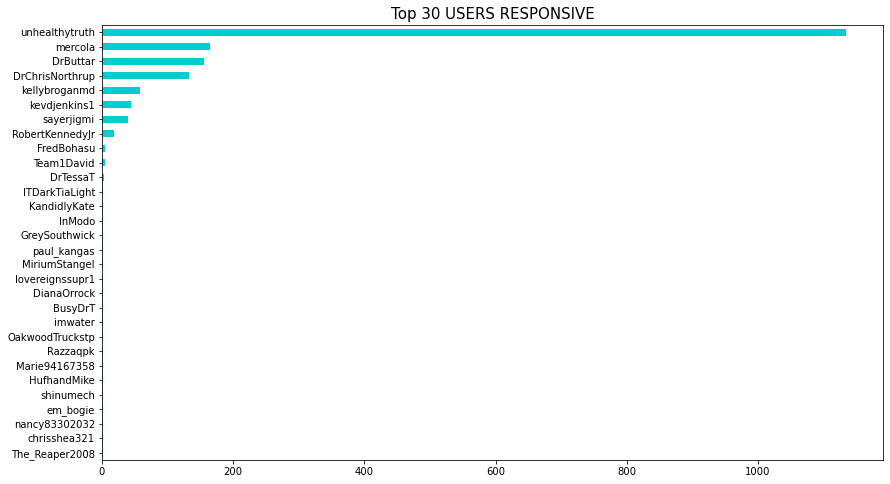

In [15]:
val = pd.Series(reply["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

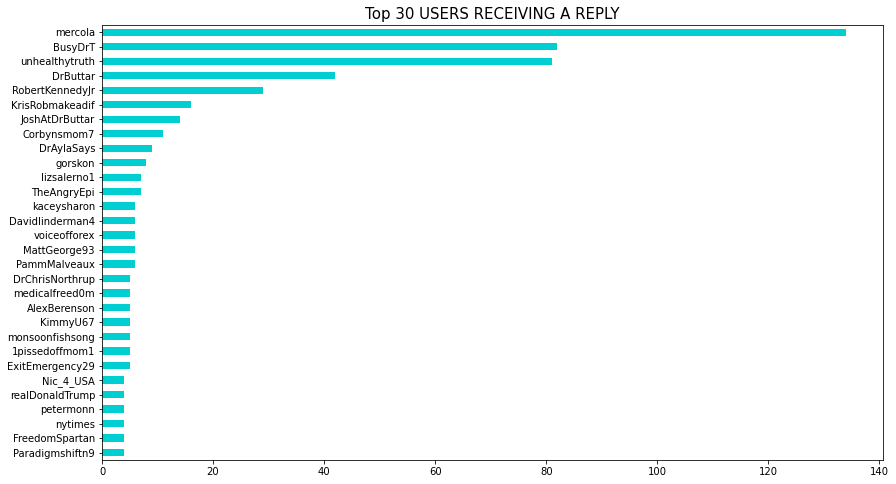

In [16]:
val = pd.Series(reply["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

## Verified Top Users
<a id="top_v"/>

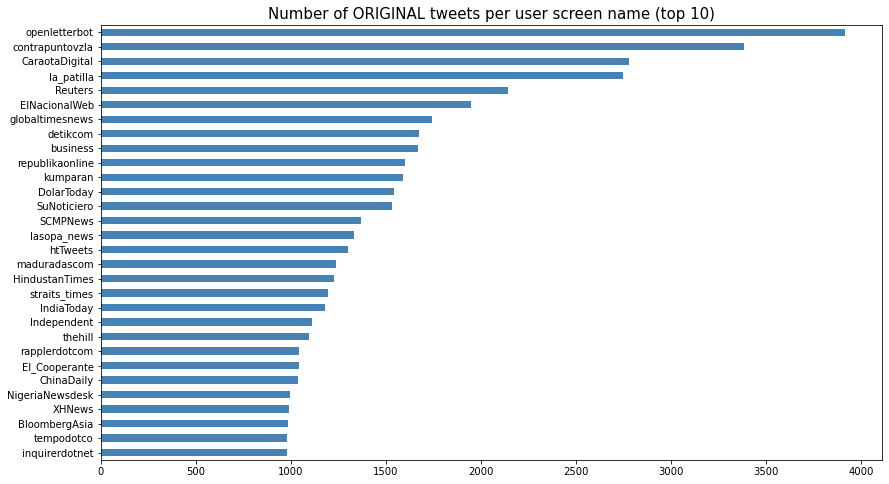

In [118]:
val = pd.Series(original_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of ORIGINAL tweets per user screen name (top 10)', fontsize=15)
ax.invert_yaxis()
plt.show()

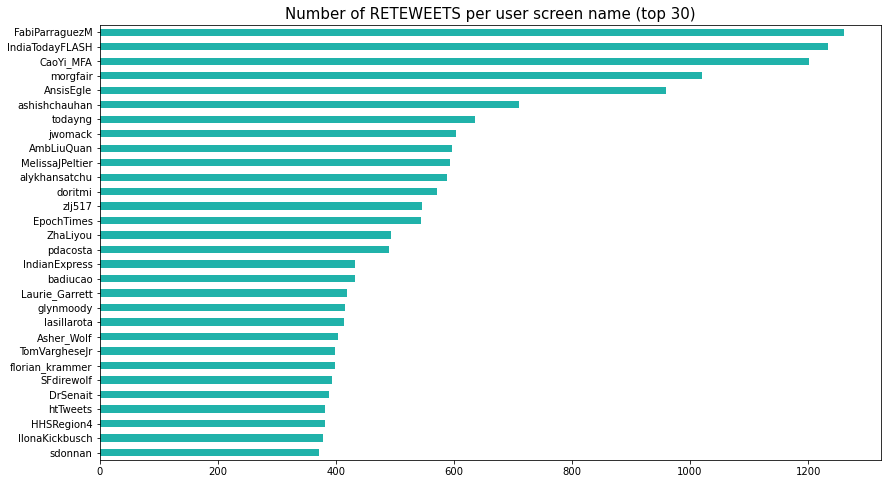

In [119]:
val = pd.Series(retweet_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #orange #lightseagreen
ax.set_title('Number of RETEWEETS per user screen name (top 30)', fontsize=15)
ax.invert_yaxis()
plt.show()

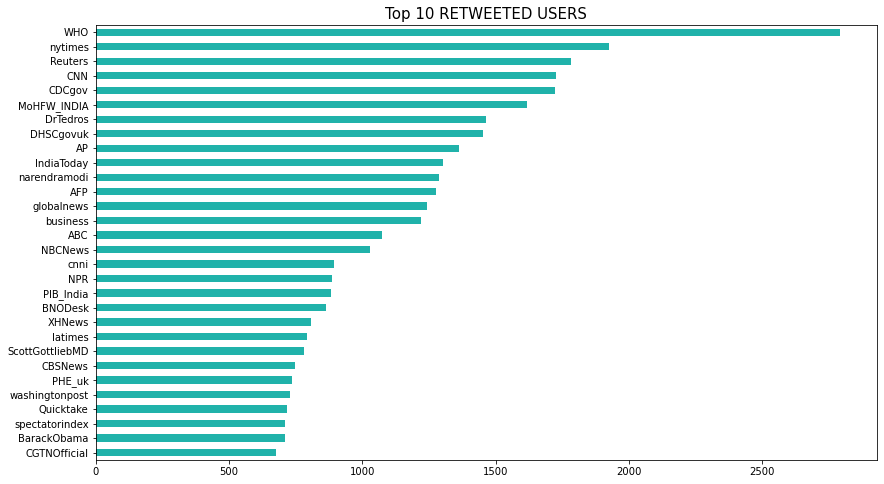

In [120]:
val = pd.Series(retweet_v["rt_user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='lightseagreen', fig=(14,14)) #green #steelblue
ax.set_title('Top 10 RETWEETED USERS', fontsize=15)
ax.invert_yaxis()
plt.show()

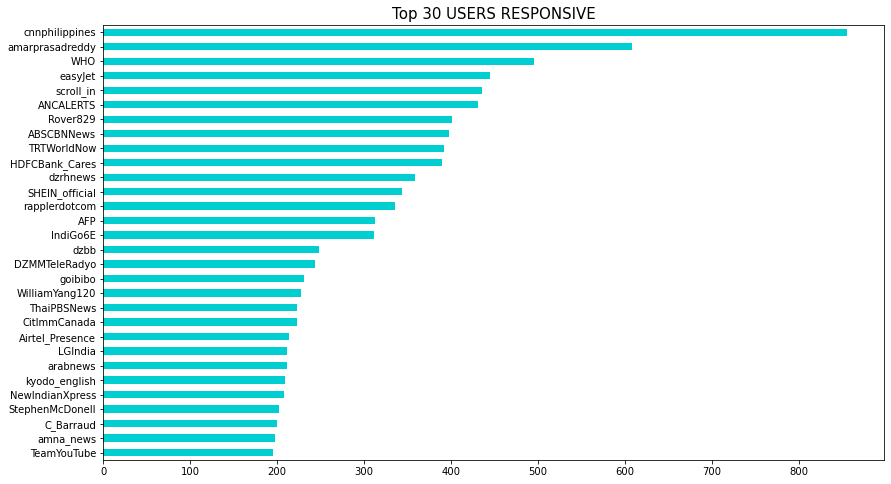

In [121]:
val = pd.Series(reply_v["user_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RESPONSIVE', fontsize=15)
ax.invert_yaxis()
plt.show()

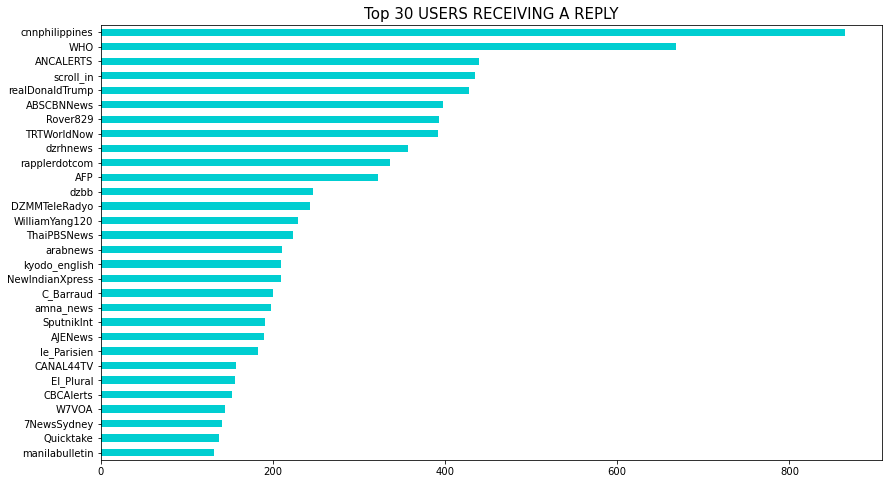

In [123]:
val = pd.Series(reply_v["in_reply_to_screen_name"])
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top 30 USERS RECEIVING A REPLY', fontsize=15)
ax.invert_yaxis()
plt.show()

### Hashtags CCDH
<a id="hastag_ccdh" />

In [17]:
tweets_with_hashtags = df.loc[df['hashtags'] != '[]']
print(f'Number of tweets with hashtags: {len(tweets_with_hashtags)}, {np.around(len(tweets_with_hashtags)*100/len(df),2)}% of total tweets')

Number of tweets with hashtags: 6149, 4.75% of total tweets


In [18]:
importlib.reload(tweets_utils)
hashtag = []
for i in df["hashtags"]:
    if(i != "[]"):
        x = i.split(" ")
        length = (len(x)) // 5
        index = 0
        for j in range(length):
            index = index + 1
            val = x[index].replace("'", "")
            x_replace = val.replace(",", "")
            hashtag.append(x_replace)
            index = index + 4

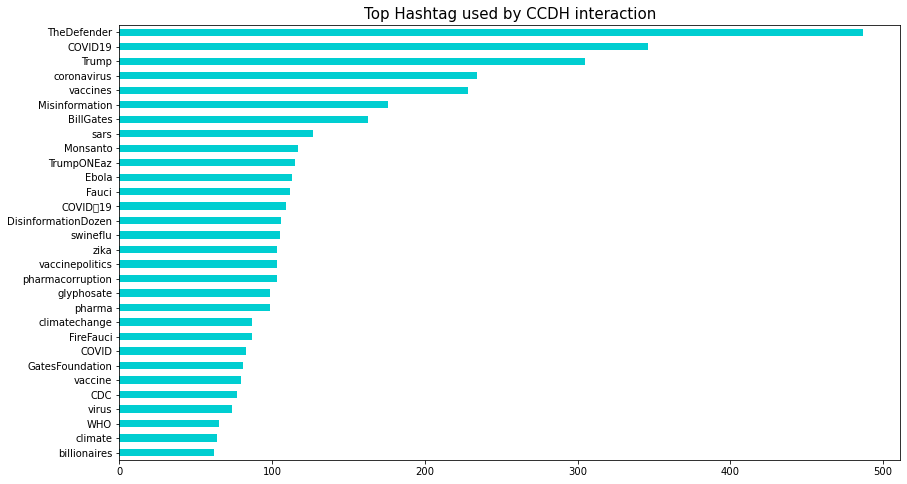

In [19]:
val = pd.Series(hashtag)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by CCDH interaction', fontsize=15)
ax.invert_yaxis()
plt.show()

In [38]:
ccdh_hashtags = val[:13]
ccdh_hashtags = list(ccdh_hashtags.index)
ccdh_hashtags.remove("coronavirus")
ccdh_hashtags.remove("vaccines")
ccdh_hashtags.remove("COVID19")
ccdh_hashtags.remove("COVIDー19")

In [41]:
df_hashtags = pd.DataFrame({'hashtag': ccdh_hashtags})
df_hashtags.to_csv(path_disinform[0] + "hashtags_sus.csv", index=False,line_terminator='\n', encoding='utf-8')

### Hashtags Verified
<a id="hastag_verified" />

In [172]:
tweets_with_hashtags = df_v.loc[df_v['hashtags'] != '[]']
print(f'Number of tweets with hashtags: {len(tweets_with_hashtags)}, {np.around(len(tweets_with_hashtags)*100/len(df_v),2)}% of total tweets')

Number of tweets with hashtags: 665989, 39.47% of total tweets


In [223]:
importlib.reload(tweets_utils)
hashtag_v = []
for i in df_v["hashtags"]:
    if(i != "[]" ) and (not type(i) == float):
        x = i.split(" ")
        length = (len(x)) // 5
        index = 0
        for j in range(length):
            index = index + 1
            val = x[index].replace("'", "")
            x_replace = val.replace(",", "")
            hashtag_v.append(x_replace)
            index = index + 4

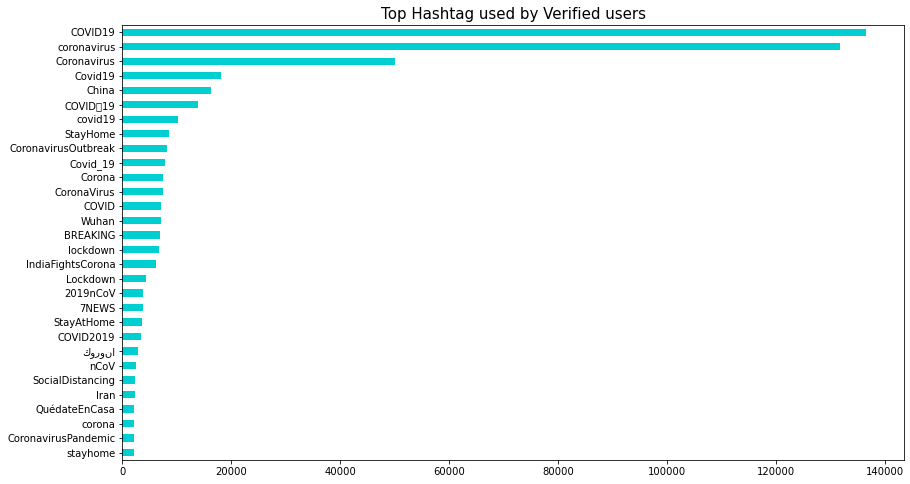

In [228]:
val = pd.Series(hashtag_v)
val = val.value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='darkturquoise', fig=(14,14)) #red #darkturquoise
ax.set_title('Top Hashtag used by Verified users', fontsize=15)
ax.invert_yaxis()
plt.show()

### Urls CCDH
<a id="ccdh_urls"/>

In [24]:
path = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/csv/")
credibility_url = pd.read_csv(path[0] + "domain_credibility.csv")
credibility_url

,Domain,Class
0,100percentfedup.com,low
1,100percentfedup.com,high
2,10news.one,low
3,12minutos.com,low
4,12news.com,high
...,...,...
820,childrenshealthdefense.org,low
821,AdvancedMedicineConference.com,low
822,aol.com,high
823,trendingpolitics.com,low


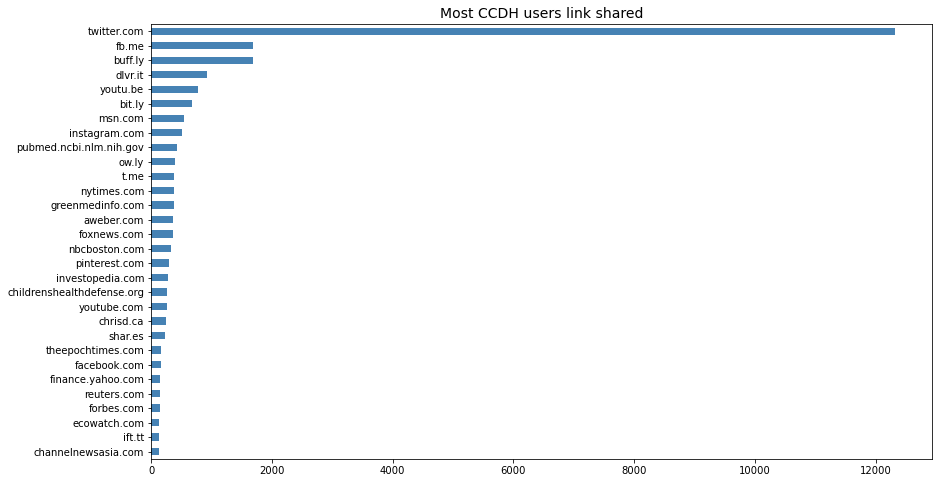

In [25]:
ccdh_urls = df["urls"]
ccdh_urls = [tweets_utils.url_decompress(v) if v != "[]" else "0" for v in ccdh_urls]
ccdh_urls = list(filter(lambda num: num != "0", ccdh_urls))
ccdh_urls = tweets_utils.remove_www(ccdh_urls)
val = pd.Series(ccdh_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most CCDH users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

#### Credibility

In [87]:
new_list_c = []
for i in range(len(credibility_url["Domain"])):
    if credibility_url["Domain"][i] in ccdh_urls:
        new_list_c.append((credibility_url["Domain"][i], credibility_url["Class"][i]))

In [88]:
value_c = []
for j in ccdh_urls:
    for i in range(len(new_list)):
        if j in new_list[i][0]:
            value_c.append(new_list[i][1])

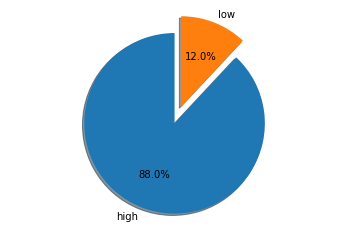

In [89]:
sizes = pd.Series(value_c).value_counts()
labels = 'high', 'low'
explode = [0,0.2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Urls Verified
<a id="ccdh_verified"/>

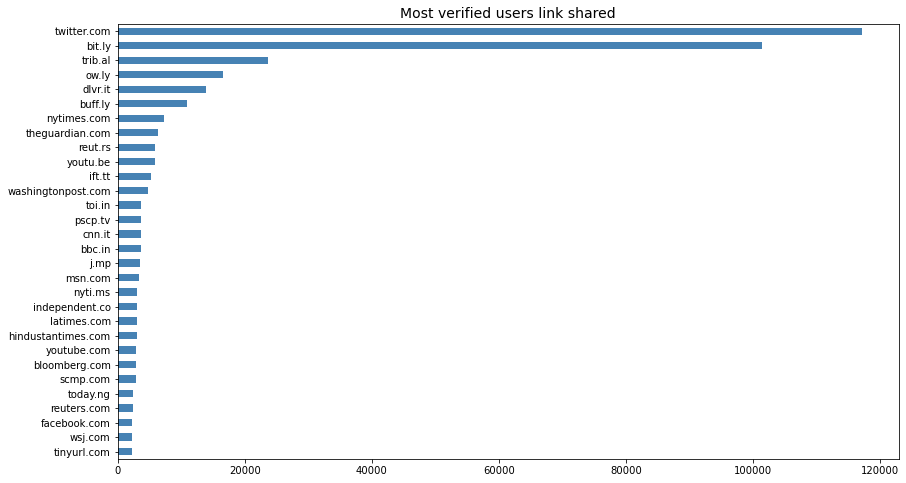

In [80]:
verified_urls = df_v["urls"]
ver = []
for v in verified_urls:
    if (v != "[]" ) and (not type(v) == float):
        ver.append(tweets_utils.url_decompress(v))
verified_urls = list(filter(lambda num: num != "0", ver))
verified_urls = tweets_utils.remove_www(verified_urls)
val = pd.Series(verified_urls).value_counts().sort_values(ascending=False)
fig = plt.figure(figsize=(14, 8))
ax = val[:30].plot(kind='barh', color='steelblue', fig=(14,14))
ax.set_title('Most verified users link shared', fontsize=14)
ax.invert_yaxis()
plt.show()

#### Credibility

In [81]:
new_list = []
for i in range(len(credibility_url["Domain"])):
    if credibility_url["Domain"][i] in verified_urls:
        new_list.append((credibility_url["Domain"][i], credibility_url["Class"][i]))

In [84]:
value = []
for j in verified_urls:
    for i in range(len(new_list)):
        if j in new_list[i][0]:
            value.append(new_list[i][1])

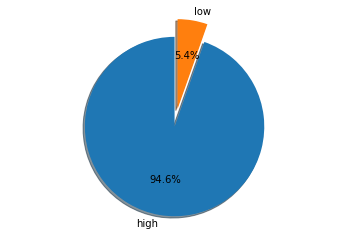

In [85]:
sizes = pd.Series(value).value_counts()
labels = 'high', 'low'
explode = [0,0.2]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### CCDH bot score distribution
<a id="ccdh_bot"/>


In [166]:
path_bot = glob.glob("C:/Users/Gianluca/Desktop/Supsi/Git/BachelorProject/")
bot = pd.read_csv(path_bot[0] + "csv/bot_score.csv")
score = pd.read_csv(path_bot[0] + "large_files/user_score.csv")
score.drop_duplicates(subset ="user", keep = False, inplace = True)
score = score.reset_index(drop=True)
bot.drop_duplicates(subset ="user", keep = False, inplace = True)
bot = bot.reset_index(drop=True)

In [146]:
df_rt_score = score[score["user"].isin(value_u)]

[0.4197222421546159, 0.6414184221423734, 0.7892294694438972, 0.8054784364249085, 0.8524047631581662]


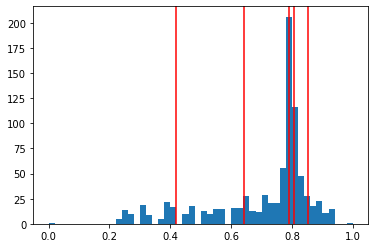

In [160]:
index = [10, 25, 50, 75, 90]
perc_numpy = [np.percentile(df_rt_score["score"], i, interpolation='nearest') for i in index]
print(perc_numpy)

plt.hist(df_rt_score["score"], 50)
for i in range(len(index)):
    plt.axvline(perc_numpy[i], color='r')
plt.show()

In [167]:
bot_rt_ccdh = bot[bot["user"].isin(value_u)]

In [168]:
bot_rt_ccdh

,id,user
160,1257997887386116096,deesbarbara
226,797547199928422401,KellyRek
350,34093672,proudCanadavet
1006,51532506,agabus98
1128,20157199,4annegs
...,...,...
2886,21603495,sigstarget
2894,466958869,KathyHoldshope
2898,174771928,tomasacat
2939,47880403,davidstevens111


### Verified bot score distribution
<a id="verified_bot"/>

In [162]:
df_v_rt_score = score[score["user"].isin(retweet_v["user_screen_name"])]
df_v_rt_score

,user,score
43,lasopa_news,0.891232
57,DolarToday,0.859506
72,redaccionmedica,0.891232
74,Independent,0.796599
76,TOICitiesNews,0.891232
...,...,...
26784,CNNnews18,0.796622
26933,FarrahFazal,0.761188
26937,joshspero,0.278726
27258,Jeeveshu,0.502712


[0.3342309004634953, 0.6004883262510591, 0.7874002196908744, 0.7970609972920484, 0.8100783815308749]


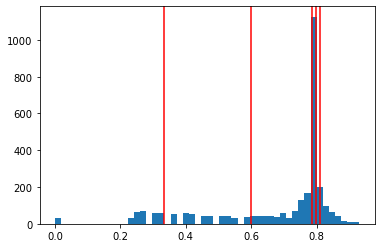

In [163]:
index = [10, 25, 50, 75, 90]
perc_numpy = [np.percentile(df_v_rt_score["score"], i, interpolation='nearest') for i in index]
print(perc_numpy)

plt.hist(df_v_rt_score["score"], 50)
for i in range(len(index)):
    plt.axvline(perc_numpy[i], color='r')
plt.show()

In [169]:
df_v_bot = bot[bot["user"].isin(retweet_v["user_screen_name"])]
df_v_bot

,id,user
21,301831339,lasopa_news
34,1016548032958091265,redaccionmedica
35,30846824,TOICitiesNews
64,18129942,tempodotco
65,1917731,thehill
...,...,...
2428,954470334,pmnewsnigeria
2429,15098879,LaNacionPy
2441,1494927698,Medscape
2450,2292116678,AMXNoticias


### Bot diff

In [170]:
vals = set(bot_rt_ccdh['user']).intersection(df_v_bot['user']) 
print(vals)

set()
